In [ ]:
# Imports
import pandas as pd
from statistics import pstdev, mean
import matplotlib.pyplot as plt

In [ ]:
# Download and unzip the dataset
!wget https://archive.ics.uci.edu/static/public/53/iris.zip
!unzip iris.zip

--2024-06-14 17:11:12--  https://archive.ics.uci.edu/static/public/53/iris.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.zip’

iris.zip                [ <=>                ]   3.65K  --.-KB/s    in 0s      

2024-06-14 17:11:12 (526 MB/s) - ‘iris.zip’ saved [3738]

Archive:  iris.zip
  inflating: Index                   
  inflating: bezdekIris.data         
  inflating: iris.data               
  inflating: iris.names              


In [ ]:
# Read the dataset using open, readlines, and close
opened_dataset = open("/content/iris.data", "r")
iris_lines = opened_dataset.readlines()
opened_dataset.close()
print(iris_lines)

['5.1,3.5,1.4,0.2,Iris-setosa\n', '4.9,3.0,1.4,0.2,Iris-setosa\n', '4.7,3.2,1.3,0.2,Iris-setosa\n', '4.6,3.1,1.5,0.2,Iris-setosa\n', '5.0,3.6,1.4,0.2,Iris-setosa\n', '5.4,3.9,1.7,0.4,Iris-setosa\n', '4.6,3.4,1.4,0.3,Iris-setosa\n', '5.0,3.4,1.5,0.2,Iris-setosa\n', '4.4,2.9,1.4,0.2,Iris-setosa\n', '4.9,3.1,1.5,0.1,Iris-setosa\n', '5.4,3.7,1.5,0.2,Iris-setosa\n', '4.8,3.4,1.6,0.2,Iris-setosa\n', '4.8,3.0,1.4,0.1,Iris-setosa\n', '4.3,3.0,1.1,0.1,Iris-setosa\n', '5.8,4.0,1.2,0.2,Iris-setosa\n', '5.7,4.4,1.5,0.4,Iris-setosa\n', '5.4,3.9,1.3,0.4,Iris-setosa\n', '5.1,3.5,1.4,0.3,Iris-setosa\n', '5.7,3.8,1.7,0.3,Iris-setosa\n', '5.1,3.8,1.5,0.3,Iris-setosa\n', '5.4,3.4,1.7,0.2,Iris-setosa\n', '5.1,3.7,1.5,0.4,Iris-setosa\n', '4.6,3.6,1.0,0.2,Iris-setosa\n', '5.1,3.3,1.7,0.5,Iris-setosa\n', '4.8,3.4,1.9,0.2,Iris-setosa\n', '5.0,3.0,1.6,0.2,Iris-setosa\n', '5.0,3.4,1.6,0.4,Iris-setosa\n', '5.2,3.5,1.5,0.2,Iris-setosa\n', '5.2,3.4,1.4,0.2,Iris-setosa\n', '4.7,3.2,1.6,0.2,Iris-setosa\n', '4.8,3.1,

In [ ]:
# Remove the last empty line if it exists
iris_lines.pop(-1)

In [ ]:
# Split lines into columns
split_lines = [line.split(',') for line in iris_lines]

In [ ]:
# Create a DataFrame from the split lines
iris_df = pd.DataFrame(split_lines, columns=["sepal length", "sepal width", "petal length", "petal width", 'class'])
iris_df = iris_df.apply(pd.to_numeric, errors='ignore')

In [ ]:
# Read the dataset into a pandas DataFrame
iris_df = pd.read_csv('/content/iris.data', header=None)
print(iris_df)

# Drop the last empty row
iris_df.dropna(inplace=True)

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Extract features
features = iris_df.iloc[:, :4]

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Calculate standard deviation for each feature
standard_dev = [pstdev(features[col]) for col in features]
print(standard_dev)

[0.8253012917851409, 0.4321465800705435, 1.7585291834055212, 0.7606126185881718]


In [ ]:
# Calculate maximum values for each feature
max_values = [features[col].max() for col in features]
print(max_values)

[7.9, 4.4, 6.9, 2.5]


In [ ]:
# Scale the feature values
scaled_values = pd.DataFrame(features.div(max_values))
print(scaled_values)

            0         1         2     3
0    0.645570  0.795455  0.202899  0.08
1    0.620253  0.681818  0.202899  0.08
2    0.594937  0.727273  0.188406  0.08
3    0.582278  0.704545  0.217391  0.08
4    0.632911  0.818182  0.202899  0.08
..        ...       ...       ...   ...
145  0.848101  0.681818  0.753623  0.92
146  0.797468  0.568182  0.724638  0.76
147  0.822785  0.681818  0.753623  0.80
148  0.784810  0.772727  0.782609  0.92
149  0.746835  0.681818  0.739130  0.72

[150 rows x 4 columns]


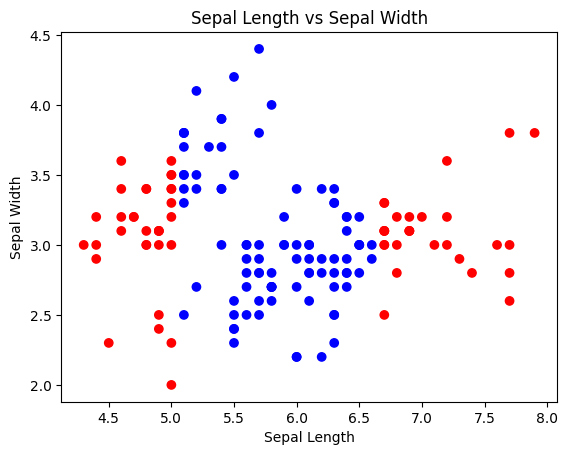

In [ ]:
# Plot sepal_length vs sepal_width with color coding based on sepal_length standard deviation
mean_sepal_length = mean(features[0])
std_sepal_length = pstdev(features[0])

colors = ['red' if abs(x - mean_sepal_length) > std_sepal_length else 'blue' for x in features[0]]

plt.scatter(features[0], features[1], c=colors)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')

# Write the plot to a file
plt.savefig('/content/plot.png')

plt.show()

In [ ]:
# Save the stdev to a text file
stdev_strings = [str(stdev) for stdev in standard_dev]
big_stdev_string = ", ".join(stdev_strings)
stdev_text = open("/content/stdevs.txt", 'w')
stdev_text.write(big_stdev_string)
stdev_text.close()

In [ ]:
# Save the scaled features to a text file
feature_strings = []

for row in scaled_values.itertuples():
  feature_string = str(row[1:])
  feature_strings.append(feature_string[1:-1])

feature_string = "\n".join(feature_strings)

feature_text = open("/content/features.txt", 'w')
feature_text.write(feature_string)
feature_text.close()